In [1]:
!pip install researchpy

In [2]:
!pip install missingno

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
import researchpy as rp
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
#pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [4]:
df=pd.read_csv('/Users/serhandulger/Desktop/marketing.csv')

In [5]:
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


## First look to dataset

In [6]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    print("##################### NA SUM #####################")
    print(dataframe.isnull().sum().sum())
    print("##################### Describe #####################")
    print(dataframe.describe())
    print("##################### Nunique #####################")
    print(dataframe.nunique())

In [7]:
check_df(df)

##################### Shape #####################
(10037, 12)
##################### Types #####################
user_id                object
date_served            object
marketing_channel      object
variant                object
converted              object
language_displayed     object
language_preferred     object
age_group              object
date_subscribed        object
date_canceled          object
subscribing_channel    object
is_retained            object
dtype: object
##################### Head #####################
      user_id date_served marketing_channel          variant converted language_displayed language_preferred    age_group date_subscribed date_canceled subscribing_channel is_retained
0  a100000029      1/1/18         House Ads  personalization      True            English            English   0-18 years          1/1/18           NaN           House Ads        True
1  a100000030      1/1/18         House Ads  personalization      True            English        

In [10]:
# Examining dataset in terms of the determine NULL values 

def data_visualizations(data):
    import missingno as msno
    import matplotlib.pyplot as plt
    import seaborn as sns
    print("VISUALIZING", "\n\n")
    msno.bar(data)
    plt.show()
    #msno.heatmap(data)
    #plt.show()
    msno.matrix(data)
    plt.show()
    print("CORRELATION GRAPH", "\n\n")
    plt.figure(figsize=(14, 12))
    #sns.heatmap(data.corr(), annot=True, cmap="BuPu")
    #plt.show()
    #sns.pairplot(data)
    #plt.show()

VISUALIZING 




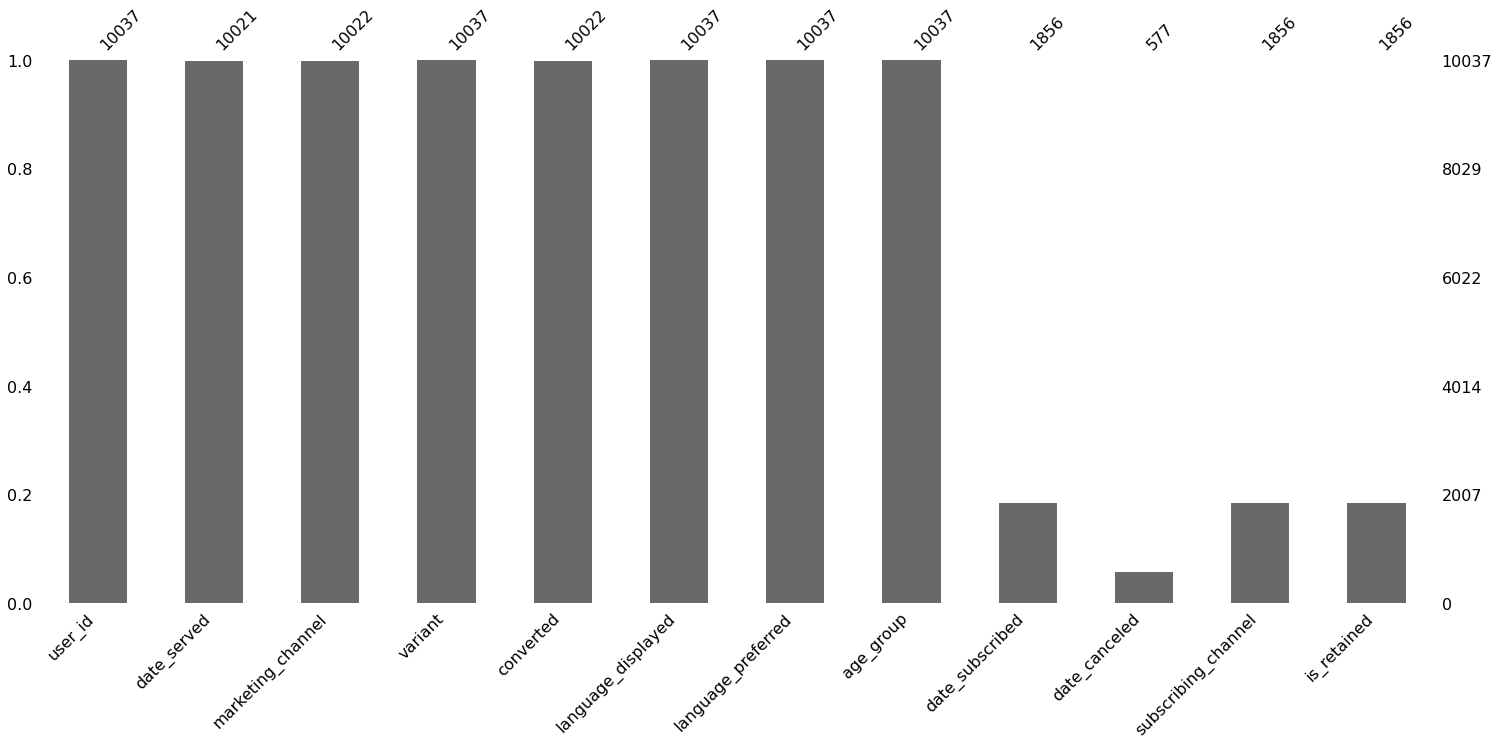

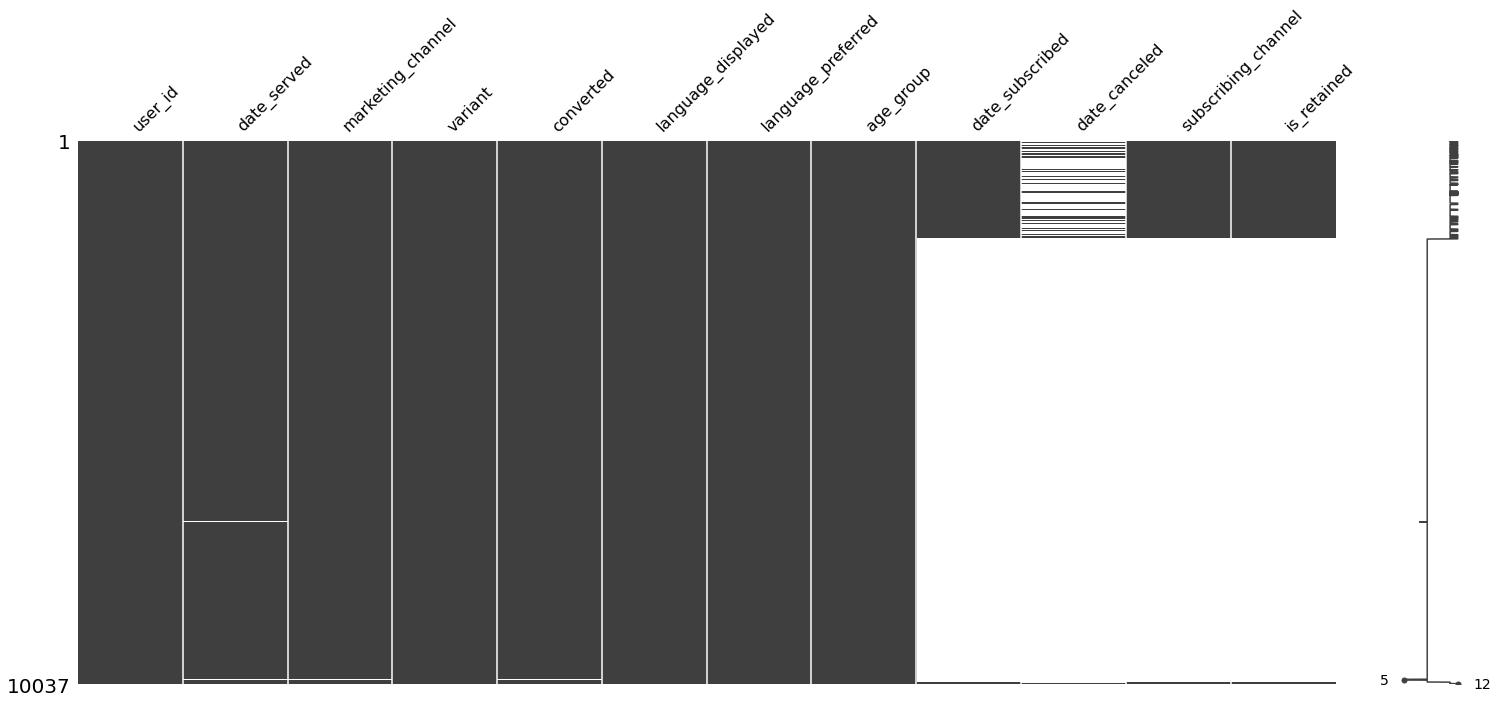

CORRELATION GRAPH 




<Figure size 1008x864 with 0 Axes>

In [11]:
data_visualizations(df)

In [12]:
# To be able to better understanding of dataset, it is a function to grab categorical - numerical and cardinal variables

def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [13]:
grab_col_names(df)

Observations: 10037
Variables: 12
cat_cols: 8
num_cols: 0
cat_but_car: 4
num_but_cat: 0


(['marketing_channel',
  'variant',
  'converted',
  'language_displayed',
  'language_preferred',
  'age_group',
  'subscribing_channel',
  'is_retained'],
 [],
 ['user_id', 'date_served', 'date_subscribed', 'date_canceled'])

In [14]:
def cat_summary(dataframe,col_name,plot=False):
    print(pd.DataFrame({col_name:dataframe[col_name].value_counts(),
                        "Ratio":100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    import seaborn as sns
    import matplotlib.pyplot as plt
    if plot:
        sns.countplot(x=dataframe[col_name],data=dataframe)
        plt.show()

In [15]:
cat_cols , num_cols, cat_but_car = grab_col_names(df)

Observations: 10037
Variables: 12
cat_cols: 8
num_cols: 0
cat_but_car: 4
num_but_cat: 0


In [16]:
cat_cols

['marketing_channel',
 'variant',
 'converted',
 'language_displayed',
 'language_preferred',
 'age_group',
 'subscribing_channel',
 'is_retained']

           marketing_channel      Ratio
House Ads               4733  47.155525
Instagram               1871  18.641028
Facebook                1860  18.531434
Push                     993   9.893394
Email                    565   5.629172
##########################################


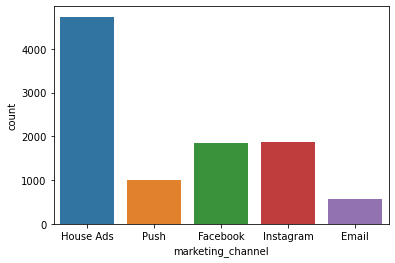

None
                 variant      Ratio
control             5091  50.722327
personalization     4946  49.277673
##########################################


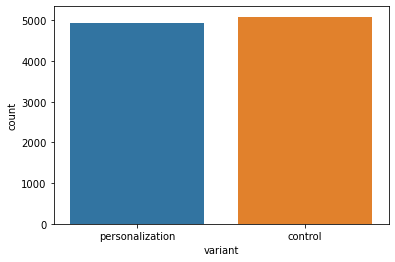

None
       converted      Ratio
False       8946  89.130218
True        1076  10.720335
##########################################


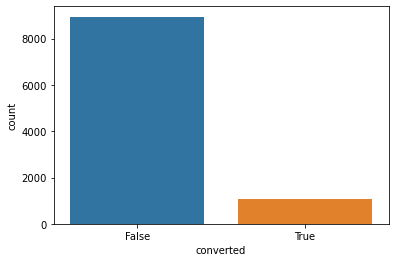

None
         language_displayed      Ratio
English                9793  97.568995
Spanish                 136   1.354987
German                   81   0.807014
Arabic                   27   0.269005
##########################################


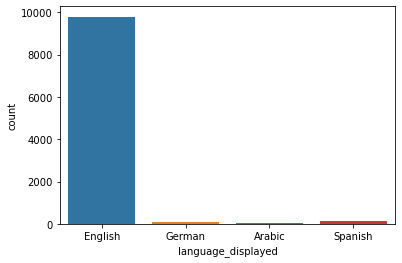

None
         language_preferred      Ratio
English                9275  92.408090
Spanish                 450   4.483411
German                  167   1.663844
Arabic                  145   1.444655
##########################################


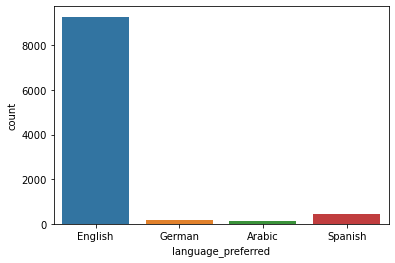

None
             age_group      Ratio
19-24 years       1682  16.757995
24-30 years       1568  15.622198
0-18 years        1539  15.333267
30-36 years       1355  13.500050
36-45 years       1353  13.480124
45-55 years       1353  13.480124
55+ years         1187  11.826243
##########################################


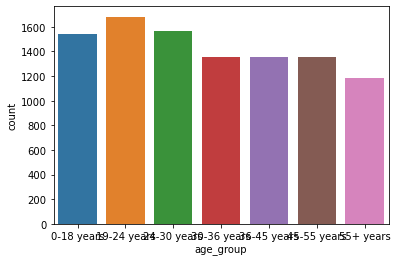

None
           subscribing_channel     Ratio
Instagram                  600  5.977882
Facebook                   445  4.433596
House Ads                  354  3.526950
Email                      290  2.889310
Push                       167  1.663844
##########################################


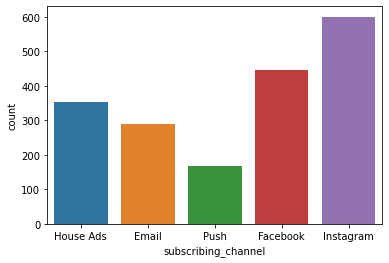

None
       is_retained      Ratio
True          1279  12.742851
False          577   5.748730
##########################################


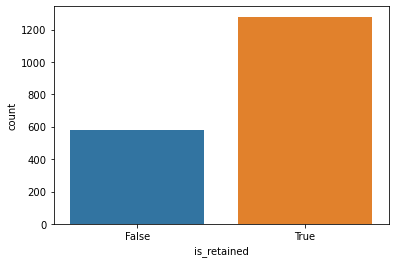

None


In [17]:
for i in cat_cols:
    print(cat_summary(df,i,plot=True))

## Data Preparation for Analysis & Exploratory Data Analysis

In [18]:
channel_dict = {"House Ads": 1, "Instagram":2, "Facebook":3,"Email":4,"Push":5}

df["channel_code"] = df["subscribing_channel"].map(channel_dict)

In [19]:
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True,1.0
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True,1.0
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True,1.0
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True,1.0
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True,1.0


In [20]:
df["is_correct_language"] = np.where(df["language_preferred"] == df["language_displayed"], "Yes","No")

In [21]:
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_correct_language
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True,1.0,Yes
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True,1.0,Yes
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True,1.0,Yes
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True,1.0,Yes
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True,1.0,Yes


In [22]:
df[df["is_correct_language"] == "No"]

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_correct_language
209,a100000319,1/12/18,House Ads,personalization,True,English,Spanish,19-24 years,1/12/18,1/26/18,House Ads,False,1.0,No
232,a100000335,1/28/18,House Ads,personalization,True,English,Spanish,19-24 years,1/28/18,NaN,House Ads,True,1.0,No
252,a100000345,1/17/18,House Ads,personalization,True,English,Spanish,45-55 years,1/17/18,2/8/18,House Ads,False,1.0,No
258,a100000348,1/20/18,House Ads,personalization,True,English,German,19-24 years,1/20/18,NaN,House Ads,True,1.0,No
268,a100000353,1/25/18,House Ads,personalization,True,English,German,0-18 years,1/25/18,3/27/18,House Ads,False,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9937,a100007210,1/26/18,House Ads,control,False,English,Arabic,19-24 years,NaN,NaN,NaN,NaN,NaN,No
9970,a100007228,1/14/18,House Ads,control,False,English,Arabic,45-55 years,NaN,NaN,NaN,NaN,NaN,No
9979,a100007237,1/23/18,House Ads,control,False,English,Arabic,0-18 years,NaN,NaN,NaN,NaN,NaN,No
9985,a100007243,1/29/18,House Ads,control,False,English,Spanish,55+ years,NaN,NaN,NaN,NaN,NaN,No


In [23]:
import datetime as dt
df["date_subscribed"] = pd.to_datetime(df["date_subscribed"]).dt.normalize()
df["date_served"] = pd.to_datetime(df["date_served"]).dt.normalize()
df["date_canceled"] = pd.to_datetime(df["date_canceled"]).dt.normalize()
df["Dow"] = df["date_subscribed"].dt.dayofweek

In [24]:
def create_date_features(df):
    df['subscribed_month'] = df["date_subscribed"].dt.month
    df['subscribed_day_of_month'] = df["date_subscribed"].dt.day
    df['subscribed_day_of_year'] = df["date_subscribed"].dt.dayofyear
    df['subscribed_week_of_year'] = df["date_subscribed"].dt.weekofyear
    df['subscribed_day_of_week'] = df["date_subscribed"].dt.dayofweek
    df['subscribed_year'] = df["date_subscribed"].dt.year
    df["subscribed_is_wknd"] = df["date_subscribed"].dt.weekday // 4
    df['subscribed_is_month_start'] = df["date_subscribed"].dt.is_month_start.astype(int)
    df['subscribed_is_month_end'] = df["date_subscribed"].dt.is_month_end.astype(int)
    return df

In [25]:
# Arranging date variables using Lambda function (alternative way)
df["subscribed_year_2"] = df["date_subscribed"].apply(lambda x: x.year)
df["subscribed_month_2"] = df["date_subscribed"].apply(lambda x: x.month)

In [26]:
create_date_features(df)

/var/folders/0x/0p_9c8gx0_d6n6_1flpcvnnh0000gn/T/ipykernel_67236/121450914.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['subscribed_week_of_year'] = df["date_subscribed"].dt.weekofyear


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_correct_language,Dow,subscribed_year_2,subscribed_month_2,subscribed_month,subscribed_day_of_month,subscribed_day_of_year,subscribed_week_of_year,subscribed_day_of_week,subscribed_year,subscribed_is_wknd,subscribed_is_month_start,subscribed_is_month_end
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,2018.0,1.0,1.0,1.0,1.0,1.0,0.0,2018.0,0.0,1,0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,2018.0,1.0,1.0,1.0,1.0,1.0,0.0,2018.0,0.0,1,0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,2018.0,1.0,1.0,1.0,1.0,1.0,0.0,2018.0,0.0,1,0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,2018.0,1.0,1.0,1.0,1.0,1.0,0.0,2018.0,0.0,1,0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,2018.0,1.0,1.0,1.0,1.0,1.0,0.0,2018.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a100007290,2018-01-17,Email,control,True,German,German,45-55 years,2018-01-17,2018-01-24,Email,False,4.0,Yes,2.0,2018.0,1.0,1.0,17.0,17.0,3.0,2.0,2018.0,0.0,0,0
10033,a100007291,2018-01-17,Email,control,True,German,German,55+ years,2018-01-17,NaT,Email,True,4.0,Yes,2.0,2018.0,1.0,1.0,17.0,17.0,3.0,2.0,2018.0,0.0,0,0
10034,a100007292,2018-01-05,Instagram,control,False,German,German,55+ years,2018-01-17,NaT,Email,True,4.0,Yes,2.0,2018.0,1.0,1.0,17.0,17.0,3.0,2.0,2018.0,0.0,0,0
10035,a100007293,2018-01-17,Email,control,True,German,German,0-18 years,2018-01-17,NaT,Email,True,4.0,Yes,2.0,2018.0,1.0,1.0,17.0,17.0,3.0,2.0,2018.0,0.0,0,0


In [27]:
## Daily users finding

In [28]:
daily_users = df.groupby(["date_served"])["user_id"].nunique()

In [29]:
daily_users

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
2018-01-11    310
2018-01-12    301
2018-01-13    306
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
2018-01-18    318
2018-01-19    305
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
2018-01-29    319
2018-01-30    317
2018-01-31    340
Name: user_id, dtype: int64

In [133]:
daily_users.mean()

314.2258064516129

 0.27% customer has made subscription more than once


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Subscription distribution per customer'),
 Text(0.5, 0, 'Subscription amount'),
 Text(0, 0.5, 'Customer amount')]

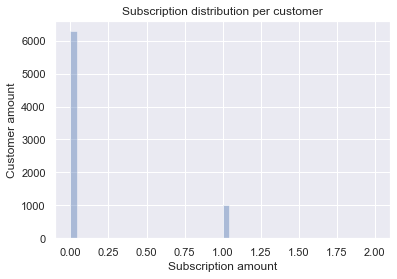

In [134]:
# How many times subscription was made by each customer
n_orders = df.groupby(["user_id"])["date_subscribed"].nunique().sort_values()
n_orders

import numpy as np 
mult_orders_perc = np.sum(n_orders > 1) / df["user_id"].nunique()
print(f"{100* mult_orders_perc: .2f}% customer has made subscription more than once")

import seaborn as sns 
ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title="Subscription distribution per customer",
      xlabel="Subscription amount",
      ylabel="Customer amount")

In [135]:
# Which age group cancels the subscription in how many days on average.
df["subs_and_cancel_timing_difference"] = df["date_canceled"] - df["date_subscribed"]

In [33]:
df.tail(10)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_correct_language,Dow,subscribed_year_2,subscribed_month_2,subscribed_month,subscribed_day_of_month,subscribed_day_of_year,subscribed_week_of_year,subscribed_day_of_week,subscribed_year,subscribed_is_wknd,subscribed_is_month_start,subscribed_is_month_end,subs_and_cancel_timing_difference
10027,a100007285,2018-01-17,Email,control,True,German,German,0-18 years,2018-01-17,2018-04-04,Email,False,4.0,Yes,2.0,2018.0,1.0,1.0,17.0,17.0,3.0,2.0,2018.0,0.0,0,0,77 days
10028,a100007286,2018-01-17,Email,control,True,German,German,19-24 years,2018-01-17,2018-03-05,Email,False,4.0,Yes,2.0,2018.0,1.0,1.0,17.0,17.0,3.0,2.0,2018.0,0.0,0,0,47 days
10029,a100007287,2018-01-17,Email,control,True,German,German,24-30 years,2018-01-17,2018-02-14,Email,False,4.0,Yes,2.0,2018.0,1.0,1.0,17.0,17.0,3.0,2.0,2018.0,0.0,0,0,28 days
10030,a100007288,2018-01-17,Email,control,True,German,German,30-36 years,2018-01-17,2018-04-26,Email,False,4.0,Yes,2.0,2018.0,1.0,1.0,17.0,17.0,3.0,2.0,2018.0,0.0,0,0,99 days
10031,a100007289,2018-01-17,Email,control,True,German,German,36-45 years,2018-01-17,2018-01-27,Email,False,4.0,Yes,2.0,2018.0,1.0,1.0,17.0,17.0,3.0,2.0,2018.0,0.0,0,0,10 days
10032,a100007290,2018-01-17,Email,control,True,German,German,45-55 years,2018-01-17,2018-01-24,Email,False,4.0,Yes,2.0,2018.0,1.0,1.0,17.0,17.0,3.0,2.0,2018.0,0.0,0,0,7 days
10033,a100007291,2018-01-17,Email,control,True,German,German,55+ years,2018-01-17,NaT,Email,True,4.0,Yes,2.0,2018.0,1.0,1.0,17.0,17.0,3.0,2.0,2018.0,0.0,0,0,NaT
10034,a100007292,2018-01-05,Instagram,control,False,German,German,55+ years,2018-01-17,NaT,Email,True,4.0,Yes,2.0,2018.0,1.0,1.0,17.0,17.0,3.0,2.0,2018.0,0.0,0,0,NaT
10035,a100007293,2018-01-17,Email,control,True,German,German,0-18 years,2018-01-17,NaT,Email,True,4.0,Yes,2.0,2018.0,1.0,1.0,17.0,17.0,3.0,2.0,2018.0,0.0,0,0,NaT
10036,a100007294,2018-01-06,Facebook,control,False,German,German,0-18 years,2018-01-17,NaT,Email,True,4.0,Yes,2.0,2018.0,1.0,1.0,17.0,17.0,3.0,2.0,2018.0,0.0,0,0,NaT


In [34]:
analysis = df.groupby(["age_group","marketing_channel"])["subs_and_cancel_timing_difference"].mean().to_frame("Mean").reset_index()

In [35]:
analysis["days"] = analysis["Mean"].apply(lambda x: x.days)

analysis.head()

,age_group,marketing_channel,Mean,days
0,0-18 years,Email,63 days 00:00:00,63
1,0-18 years,Facebook,44 days 12:34:17.142857143,44
2,0-18 years,House Ads,38 days 18:53:37.021276595,38
3,0-18 years,Instagram,40 days 00:00:00,40
4,0-18 years,Push,49 days 21:20:00,49


<AxesSubplot:xlabel='marketing_channel', ylabel='days'>

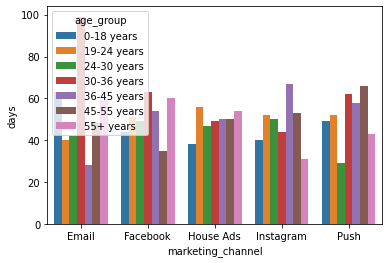

In [36]:
sns.barplot(x="marketing_channel",y="days",hue="age_group",data=analysis)

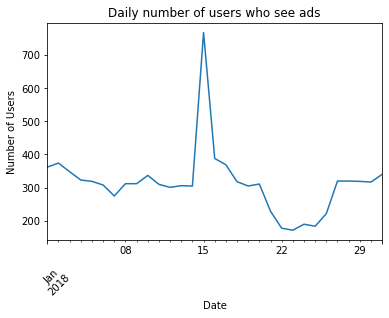

In [37]:
import matplotlib.pyplot as plt
daily_users.plot()
plt.title("Daily number of users who see ads")
plt.xlabel("Date")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.show()

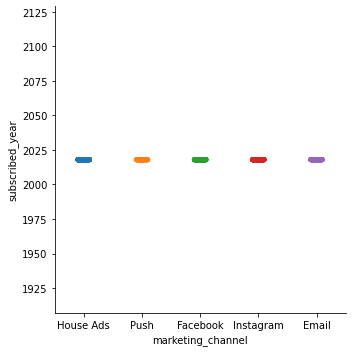

In [38]:
# We checked the dataset to see if there are any marketing channels in other years.
sns.catplot(x="marketing_channel",y="subscribed_year",data=df)

<AxesSubplot:xlabel='marketing_channel', ylabel='subscribed_day_of_month'>

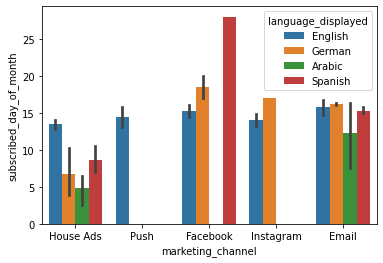

In [39]:
sns.barplot(x="marketing_channel",y="subscribed_day_of_month",hue="language_displayed",data=df)

In [40]:
grouping = df.groupby(["marketing_channel","subscribed_day_of_month"])["user_id"].nunique().to_frame(name="Count").reset_index()

In [41]:
grouping

,marketing_channel,subscribed_day_of_month,Count
0,Email,1.0,1
1,Email,2.0,4
2,Email,3.0,1
3,Email,4.0,2
4,Email,5.0,1
...,...,...,...
150,Push,27.0,4
151,Push,28.0,2
152,Push,29.0,3
153,Push,30.0,3


In [42]:
grouping_arranged = grouping.pivot("marketing_channel","subscribed_day_of_month","Count")

grouping_arranged

subscribed_day_of_month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0
marketing_channel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Email,1,4,1,2,1,5,2,1,2,3,3,1,3,1,46,53,35,4,1,2,2,1,2,2,2,2,1,3,2,3,1
Facebook,11,11,9,12,9,11,7,13,10,10,10,8,11,10,8,23,23,13,5,8,9,8,6,10,7,8,7,11,6,9,7
House Ads,23,29,28,26,31,27,27,27,30,31,18,17,15,14,16,37,32,20,13,14,10,12,10,13,14,11,14,14,11,11,10
Instagram,12,11,12,11,13,9,12,11,12,11,8,8,7,12,10,20,26,12,6,6,7,9,9,8,8,6,5,5,7,5,4
Push,4,7,5,3,6,3,5,3,3,2,4,5,5,3,6,16,14,2,4,4,3,2,4,3,2,2,4,2,3,3,2


<AxesSubplot:xlabel='subscribed_day_of_month', ylabel='marketing_channel'>

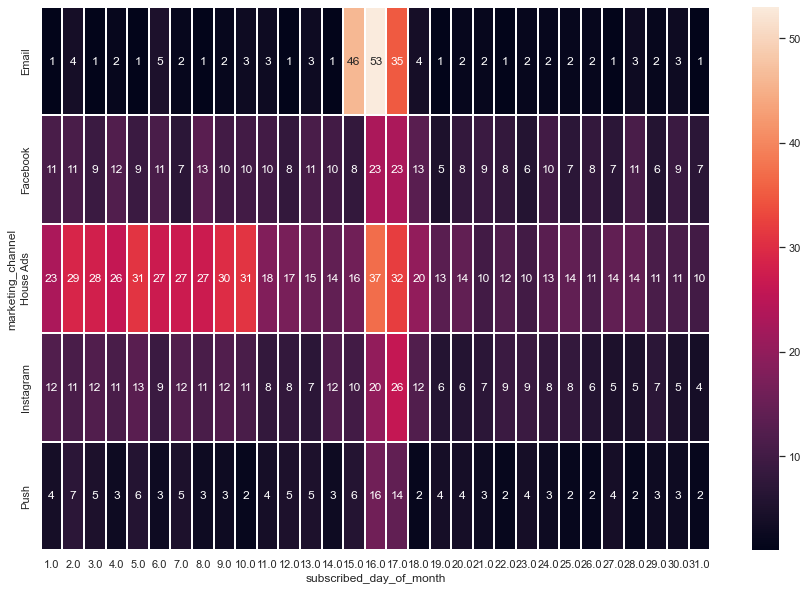

In [43]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
sns.heatmap(grouping_arranged, annot=True, linewidths=.10 , fmt = ".2g")

In [44]:
grouping2 = df.groupby(["age_group","subscribed_day_of_month"])["user_id"].nunique().to_frame(name="Count").reset_index()

In [45]:
grouping_arranged2 = grouping2.pivot("age_group","subscribed_day_of_month","Count")

grouping_arranged2

subscribed_day_of_month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0
age_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0-18 years,10.0,13.0,9.0,8.0,12.0,7.0,6.0,9.0,12.0,8.0,8.0,4.0,7.0,7.0,17.0,26.0,18.0,4.0,4.0,6.0,6.0,4.0,4.0,9.0,4.0,4.0,9.0,4.0,3.0,7.0,6.0
19-24 years,13.0,13.0,15.0,14.0,16.0,16.0,12.0,10.0,11.0,16.0,13.0,14.0,7.0,12.0,20.0,29.0,19.0,15.0,4.0,5.0,7.0,9.0,5.0,7.0,12.0,6.0,4.0,12.0,5.0,5.0,8.0
24-30 years,11.0,7.0,10.0,11.0,10.0,9.0,12.0,8.0,8.0,9.0,12.0,7.0,10.0,4.0,31.0,33.0,17.0,6.0,7.0,5.0,5.0,5.0,7.0,7.0,7.0,9.0,5.0,6.0,12.0,5.0,5.0
30-36 years,4.0,7.0,3.0,3.0,6.0,8.0,6.0,7.0,5.0,4.0,1.0,7.0,4.0,6.0,3.0,8.0,12.0,6.0,2.0,5.0,3.0,1.0,5.0,2.0,2.0,2.0,4.0,1.0,2.0,5.0,1.0
36-45 years,6.0,5.0,8.0,3.0,4.0,5.0,7.0,5.0,7.0,5.0,1.0,1.0,9.0,3.0,6.0,5.0,14.0,3.0,3.0,3.0,4.0,3.0,2.0,4.0,2.0,2.0,3.0,3.0,1.0,3.0,4.0
45-55 years,3.0,6.0,5.0,9.0,3.0,3.0,7.0,7.0,7.0,7.0,4.0,1.0,2.0,8.0,3.0,11.0,10.0,5.0,4.0,2.0,3.0,5.0,3.0,1.0,4.0,1.0,3.0,3.0,3.0,2.0,2.0
55+ years,4.0,1.0,2.0,4.0,4.0,3.0,3.0,5.0,4.0,4.0,1.0,2.0,3.0,NaN,3.0,6.0,9.0,3.0,2.0,3.0,1.0,3.0,3.0,1.0,NaN,3.0,1.0,1.0,1.0,3.0,1.0


<AxesSubplot:xlabel='subscribed_day_of_month', ylabel='age_group'>

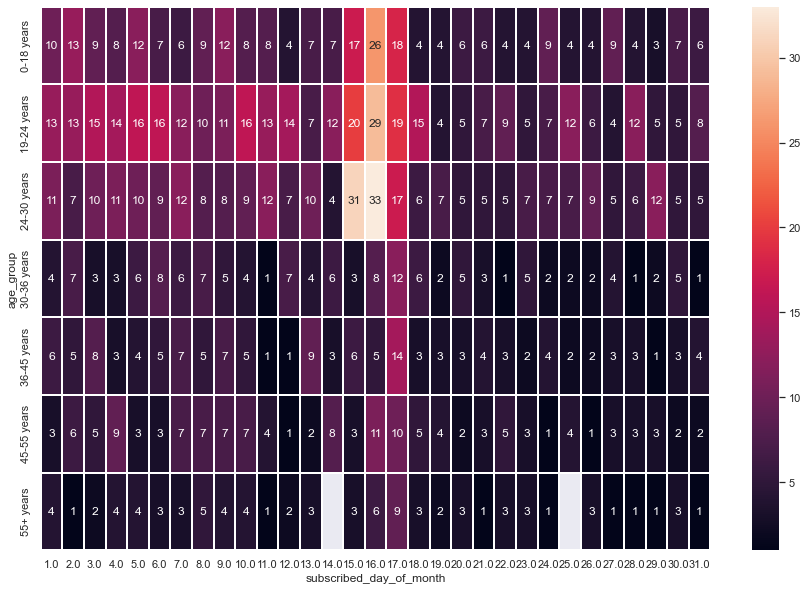

In [46]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
sns.heatmap(grouping_arranged2, annot=True, linewidths=.10 , fmt = ".2g")

## Introduction to Common Marketing Metrics

### Conversion Rate

In [47]:
## Conversion Rate = #of People who convert / Total #of people we marketed to

In [48]:
subscribers = df[df["converted"] == True]["user_id"].nunique()

In [49]:
subscribers

1015

In [50]:
total = df["user_id"].nunique()

In [51]:
conversion_rate = subscribers / total

In [52]:
print(round(conversion_rate*100,2),"%")

13.89 %


### Retention Rate

In [53]:
## Retention Rate

## Retention Rate =  #of People who remained subscribed / Total #of people who converted

In [54]:
df["is_retained"].isnull().sum()

8181

In [55]:
df["is_retained"].mode()[0]

True

In [56]:
df["is_retained"].fillna(df["is_retained"].mode()[0],inplace=True)

In [57]:
df["is_retained"].isnull().sum()

0

In [58]:
retained = df[df["is_retained"] == True]["user_id"].nunique()

In [59]:
subscribers = df[df["converted"] == True]["user_id"].nunique()

In [60]:
print( f" Retained customer", retained)
print( f" Total Subscribers", subscribers)

 Retained customer 6967
 Total Subscribers 1015


In [61]:
retention = retained / subscribers

In [62]:
#RETENTION RATE
print(round(retention*100,2),"%")

686.4 %


## Customer Segmentation

### Segmenting using Pandas

In [63]:
house_ads = df[df["subscribing_channel"] == "House Ads"]

In [64]:
retained_ha = house_ads[house_ads["is_retained"]==True]["user_id"].nunique()
subscribers_ha = house_ads[house_ads["converted"]==True]["user_id"].nunique()

In [65]:
retention_rate = retained_ha / subscribers_ha

In [66]:
#RETENTION RATE
#Number of users retained by the number of subscribers
#who originally subscribed through a House ADS

print(f" Retention Rate for House Ads Subscribers :", retention_rate*100, "%")

 Retention Rate for House Ads Subscribers : 58.053691275167786 %


## Segmenting using Pandas groupby()

In [67]:
# Group by subscribing channel and calculate retention

retained1 = df[df["is_retained"] == True].groupby(["subscribing_channel"])["user_id"].nunique()

In [68]:
retained1

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64

In [69]:
# Group by subscribing channel and calculating subscribers

subscribers1 = df[df["converted"] == True].groupby(["subscribing_channel"])["user_id"].nunique()

In [70]:
subscribers1

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64

In [71]:
## Segmenting Results

#Calculate the retention rate accross the DataFrame

channel_retention_rate = (retained1/subscribers1)*100
print(channel_retention_rate)

subscribing_channel
Email        87.577640
Facebook     68.778281
House Ads    58.053691
Instagram    68.103448
Push         70.129870
Name: user_id, dtype: float64


## Comparing Language Conversion Rate

In [72]:
# Group by language_displayed and count unique users

total = df.groupby(df["language_displayed"])["user_id"].nunique()

In [73]:
total

language_displayed
Arabic       24
English    7169
German       74
Spanish     120
Name: user_id, dtype: int64

In [74]:
# Group by language displayed and count unique conversions

subscribers3 = df[df["converted"]==True].groupby(["language_displayed"])["user_id"].nunique()

In [75]:
subscribers3

language_displayed
Arabic      12
English    926
German      53
Spanish     24
Name: user_id, dtype: int64

In [76]:
# Calculate the conversion rate for all languages

language_conversion_rate = subscribers3/total

print(f" Language conversion rates for each languages :", language_conversion_rate*100, "%")

 Language conversion rates for each languages : language_displayed
Arabic     50.000000
English    12.916725
German     71.621622
Spanish    20.000000
Name: user_id, dtype: float64 %


In [77]:
## Aggregating by Date

In [78]:
# Group by date_served and count unique users

total = df.groupby(["date_served"])["user_id"].nunique()

#Group by date_served and count unique converted users 
subscribers4 = df[df["converted"]==True].groupby(df["date_served"])["user_id"].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers4/total

print(daily_conversion_rate)

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


## Plotting Campaign Results

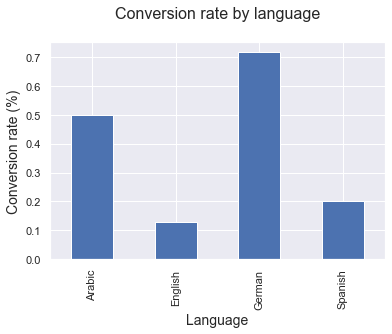

In [79]:
# Comparing language conversion rate

import matplotlib.pyplot as plt

# Creating a barchart using channel retention dataframe

language_conversion_rate.plot(kind="bar")
# Add a title and x and y-axis labels
plt.title('Conversion rate by language\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Language', size = 14)

# Display the plot
plt.show()

In [80]:
## Reset index to turn the Series into a DataFrame 

daily_conversion_rate = pd.DataFrame(daily_conversion_rate.reset_index())

daily_conversion_rate

,date_served,user_id
0,2018-01-01,0.099448
1,2018-01-02,0.098930
2,2018-01-03,0.103448
3,2018-01-04,0.108359
4,2018-01-05,0.125392
5,2018-01-06,0.113636
6,2018-01-07,0.141818
7,2018-01-08,0.115385
8,2018-01-09,0.125000
9,2018-01-10,0.118694


In [83]:
## Rename the columns

daily_conversion_rate.columns = ["date_served","conversion_rate"]

In [85]:
daily_conversion_rate

,date_served,conversion_rate
0,2018-01-01,0.099448
1,2018-01-02,0.098930
2,2018-01-03,0.103448
3,2018-01-04,0.108359
4,2018-01-05,0.125392
5,2018-01-06,0.113636
6,2018-01-07,0.141818
7,2018-01-08,0.115385
8,2018-01-09,0.125000
9,2018-01-10,0.118694


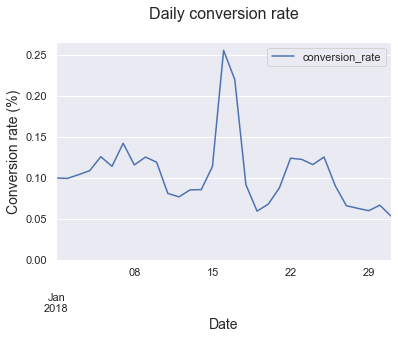

In [86]:
daily_conversion_rate.plot("date_served","conversion_rate")

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

## Plotting Campaign Results

In [87]:
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_correct_language,Dow,subscribed_year_2,subscribed_month_2,subscribed_month,subscribed_day_of_month,subscribed_day_of_year,subscribed_week_of_year,subscribed_day_of_week,subscribed_year,subscribed_is_wknd,subscribed_is_month_start,subscribed_is_month_end,subs_and_cancel_timing_difference
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,2018.0,1.0,1.0,1.0,1.0,1.0,0.0,2018.0,0.0,1,0,NaT
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,2018.0,1.0,1.0,1.0,1.0,1.0,0.0,2018.0,0.0,1,0,NaT
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,2018.0,1.0,1.0,1.0,1.0,1.0,0.0,2018.0,0.0,1,0,NaT
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,2018.0,1.0,1.0,1.0,1.0,1.0,0.0,2018.0,0.0,1,0,NaT
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,2018.0,1.0,1.0,1.0,1.0,1.0,0.0,2018.0,0.0,1,0,NaT


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype          
---  ------                             --------------  -----          
 0   user_id                            10037 non-null  object         
 1   date_served                        10021 non-null  datetime64[ns] 
 2   marketing_channel                  10022 non-null  object         
 3   variant                            10037 non-null  object         
 4   converted                          10022 non-null  object         
 5   language_displayed                 10037 non-null  object         
 6   language_preferred                 10037 non-null  object         
 7   age_group                          10037 non-null  object         
 8   date_subscribed                    1856 non-null   datetime64[ns] 
 9   date_canceled                      577 non-null    datetime64[ns] 
 10  subscribing_channel   

In [89]:
import researchpy as rp

rp.summary_cat(df["age_group"])

,Variable,Outcome,Count,Percent
0,age_group,19-24 years,1682,16.76
1,,24-30 years,1568,15.62
2,,0-18 years,1539,15.33
3,,30-36 years,1355,13.50
4,,36-45 years,1353,13.48
5,,45-55 years,1353,13.48
6,,55+ years,1187,11.83


In [90]:
# Marketing channels across age groups

df.groupby("marketing_channel")["age_group"].count()

marketing_channel
Email         565
Facebook     1860
House Ads    4733
Instagram    1871
Push          993
Name: age_group, dtype: int64

In [91]:
channel_age = df.groupby(["marketing_channel","age_group"])["user_id"].count()

In [92]:
channel_age

marketing_channel  age_group  
Email              0-18 years      93
                   19-24 years    111
                   24-30 years    120
                   30-36 years     60
                   36-45 years     63
                   45-55 years     65
                   55+ years       53
Facebook           0-18 years     264
                   19-24 years    347
                   24-30 years    296
                   30-36 years    249
                   36-45 years    226
                   45-55 years    299
                   55+ years      179
House Ads          0-18 years     694
                   19-24 years    761
                   24-30 years    681
                   30-36 years    699
                   36-45 years    589
                   45-55 years    678
                   55+ years      631
Instagram          0-18 years     300
                   19-24 years    315
                   24-30 years    286
                   30-36 years    259
                   

In [93]:
# Unstack channel age and transform it into a DataFrame

channel_age_df = pd.DataFrame(channel_age.unstack(level=1))

channel_age_df

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
marketing_channel,,,,,,,
Email,93,111,120,60,63,65,53
Facebook,264,347,296,249,226,299,179
House Ads,694,761,681,699,589,678,631
Instagram,300,315,286,259,280,227,204
Push,186,145,183,86,193,82,118


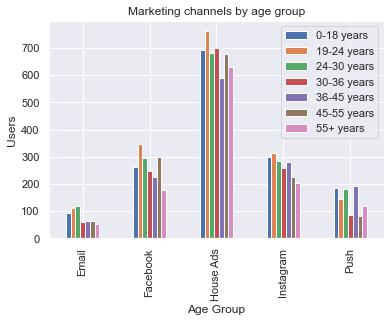

In [94]:
# Plot the results

channel_age_df.plot(kind="bar")

plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()

## Grouping and counting multiple columns

In [95]:
# Count the subs by subscribing channel and date subscribed

retention_total = df.groupby(["date_subscribed","subscribing_channel"])["user_id"].nunique()

print(retention_total)

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
                                        ..
2018-01-31       Email                   1
                 Facebook                6
                 House Ads               6
                 Instagram               3
                 Push                    2
Name: user_id, Length: 155, dtype: int64


In [96]:
# Count the retained subs by subscribing channel and date subscribed

retention_subs = df[df["is_retained"] == True].groupby(["date_subscribed","subscribing_channel"])["user_id"].nunique()

# Print results
print(retention_subs)

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
                                        ..
2018-01-31       Email                   1
                 Facebook                5
                 House Ads               3
                 Instagram               2
                 Push                    1
Name: user_id, Length: 146, dtype: int64


In [97]:
# Divide retained subscribers by total subscribers

retention_rate = retention_subs / retention_total

In [98]:
retention_rate

date_subscribed  subscribing_channel
2018-01-01       Email                  1.000000
                 Facebook               0.875000
                 House Ads              0.687500
                 Instagram              0.750000
                 Push                   1.000000
                                          ...   
2018-01-31       Email                  1.000000
                 Facebook               0.833333
                 House Ads              0.500000
                 Instagram              0.666667
                 Push                   0.500000
Name: user_id, Length: 155, dtype: float64

In [99]:
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

retention_rate_df

subscribing_channel,Email,Facebook,House Ads,Instagram,Push
date_subscribed,,,,,
2018-01-01,1.000000,0.875000,0.687500,0.750000,1.000000
2018-01-02,0.750000,1.000000,0.588235,0.625000,1.000000
2018-01-03,NaN,0.800000,0.647059,0.909091,0.666667
2018-01-04,0.500000,0.666667,0.466667,0.500000,NaN
2018-01-05,1.000000,0.571429,0.500000,0.636364,1.000000
2018-01-06,0.800000,0.571429,0.941176,0.500000,0.500000
2018-01-07,0.500000,0.750000,0.526316,0.400000,0.666667
2018-01-08,NaN,0.888889,0.500000,0.625000,1.000000
2018-01-09,0.500000,0.285714,0.850000,0.666667,0.500000


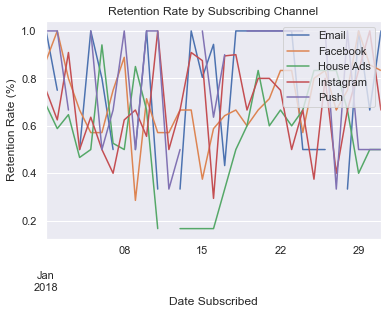

In [136]:
# Plotting retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc = 'upper right', 
           labels = retention_rate_df.columns.values)
plt.show()

# Conversion Attribution

## Building the functions to automate the analysis

In [101]:
# Building a conversion function

In [102]:
def conversion_rate(dataframe,column_names):
    #Total number of converted users
    column_conv = dataframe[dataframe["converted"] == True].groupby(column_names)["user_id"] .nunique()
    
    # Total number of users
    column_total = dataframe.groupby(column_names)["user_id"].nunique()
    
    # Conversion rate
    conversion_rate = column_conv / column_total
    
    #Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    
    return conversion_rate

In [137]:
## Testing and visualizing conversion function

# Calculating conversion rate by age group

age_group_conv = conversion_rate(df,["date_served","age_group"])

age_group_conv

date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
2018-01-31   24-30 years    0.057692
             30-36 years    0.000000
             36-45 years    0.035088
             45-55 years    0.023256
             55+ years      0.026316
Name: user_id, Length: 217, dtype: float64

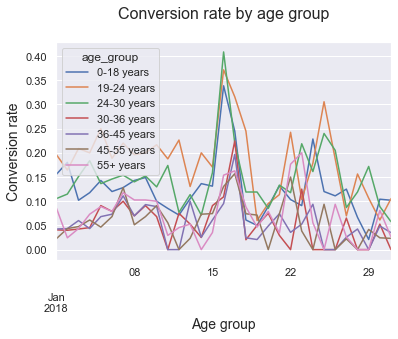

In [138]:
# Unstacking and creating a dataframe

age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Visualizing conversion by age_group

age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

In [139]:
# Scenarios

We've looked at conversion rate by age, we want to see if that trend has changed over time. Marketing has been changing their strategy and wants to make sure that their new method isn't alienating age groups that are less comfortable with their product. However, to do so, we need to create a plotting function to make it easier to visualize our results.

In [105]:
def plotting_conv(dataframe):
    for x in dataframe:
        #Plot column by dataframe's index
        plt.plot(dataframe.index,dataframe[x])
        plt.title('Daily ' + str(x) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        # Show plot
        plt.show()
        plt.clf()

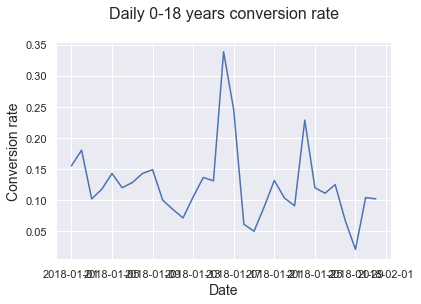

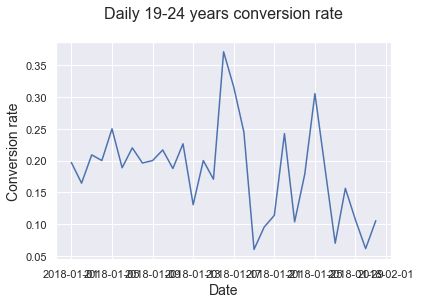

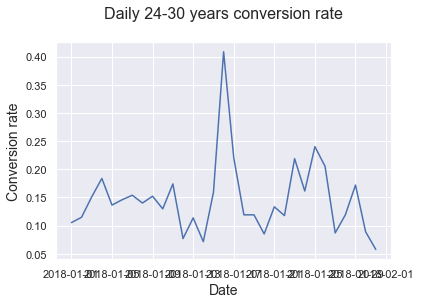

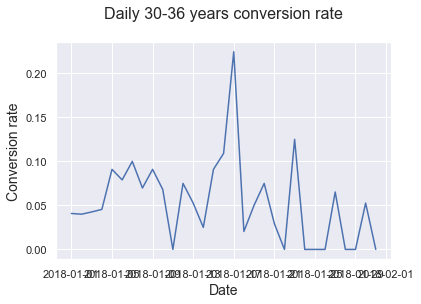

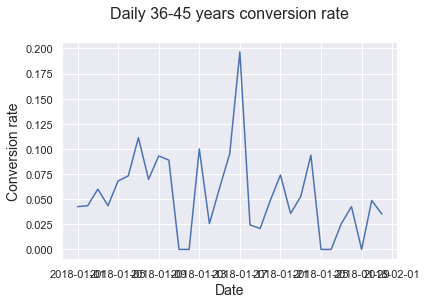

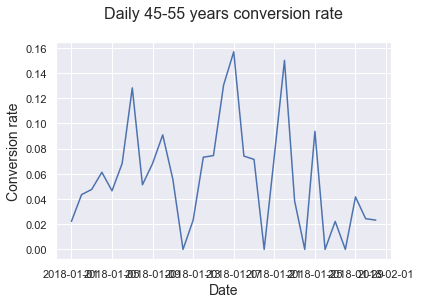

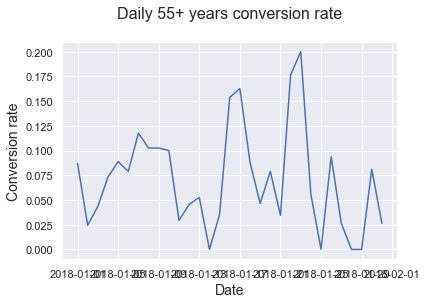

<Figure size 432x288 with 0 Axes>

In [106]:
# Calculate conversion rate by date served and age group

age_group_conv = conversion_rate(df,["date_served","age_group"])

# Unstack age_group_conv and create a dataframe

age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

#Plot the results

plotting_conv(age_group_df)

## Identifying Inconsistencies

House ads conversion rate
The house ads team has become worried about some irregularities they've noticed in conversion rate. It is common for stakeholders to come to you with concerns they've noticed around changing metrics. As a data scientist, it's our job to determine whether these changes are natural fluctuations or if they require further investigation.

We'll try out our conversion_rate() and plotting_conv() functions out on marketing looking at conversion rate by 'date_served' and 'marketing_channel'.

In [107]:
# Calculating conversion rate by date served and channel

daily_conv_channel = conversion_rate(df, ["date_served","marketing_channel"])

print(daily_conv_channel)

date_served  marketing_channel
2018-01-01   Email                1.000000
             Facebook             0.117647
             House Ads            0.084656
             Instagram            0.106667
             Push                 0.083333
                                    ...   
2018-01-31   Email                1.000000
             Facebook             0.078947
             House Ads            0.038217
             Instagram            0.041096
             Push                 0.052632
Name: user_id, Length: 155, dtype: float64


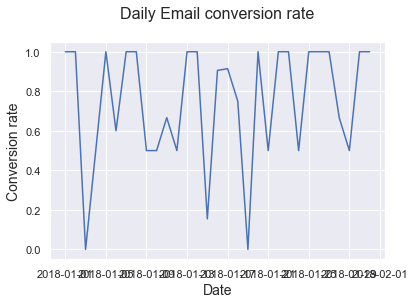

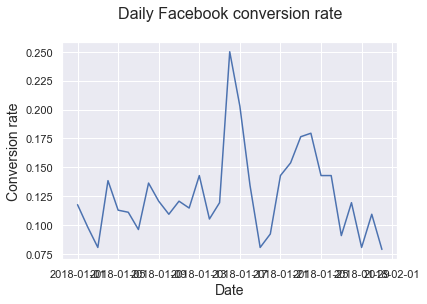

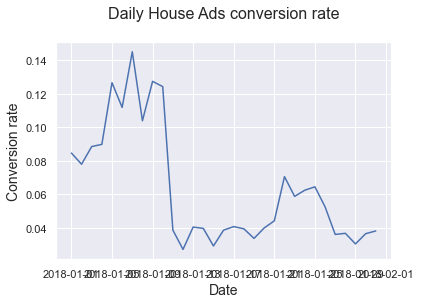

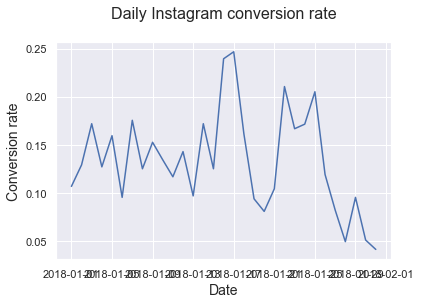

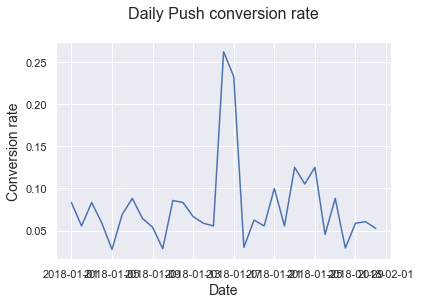

<Figure size 432x288 with 0 Axes>

In [140]:
# Calculating conversion rate by date served and channel

daily_conv_channel = conversion_rate(df, ["date_served","marketing_channel"])

# Unstacking daily_conv_channel and converting it to a Dataframe

daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level=1))

# Plotting the results of daily_conv_channel
plotting_conv(daily_conv_channel)

# Analyzing HouseAds Conversion Rate

In [109]:
df.head(2)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_correct_language,Dow,subscribed_year_2,subscribed_month_2,subscribed_month,subscribed_day_of_month,subscribed_day_of_year,subscribed_week_of_year,subscribed_day_of_week,subscribed_year,subscribed_is_wknd,subscribed_is_month_start,subscribed_is_month_end,subs_and_cancel_timing_difference
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,2018.0,1.0,1.0,1.0,1.0,1.0,0.0,2018.0,0.0,1,0,NaT
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,2018.0,1.0,1.0,1.0,1.0,1.0,0.0,2018.0,0.0,1,0,NaT


In [110]:
df["DoW_served"] = df["date_served"].dt.dayofweek

In [111]:
df.head(2)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_correct_language,Dow,subscribed_year_2,subscribed_month_2,subscribed_month,subscribed_day_of_month,subscribed_day_of_year,subscribed_week_of_year,subscribed_day_of_week,subscribed_year,subscribed_is_wknd,subscribed_is_month_start,subscribed_is_month_end,subs_and_cancel_timing_difference,DoW_served
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,2018.0,1.0,1.0,1.0,1.0,1.0,0.0,2018.0,0.0,1,0,NaT,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,2018.0,1.0,1.0,1.0,1.0,1.0,0.0,2018.0,0.0,1,0,NaT,0.0


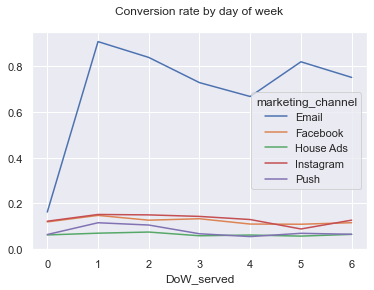

In [112]:
# Calculate day of conversion rate by day of week

DoW_conversion = conversion_rate(df,["DoW_served","marketing_channel"])

# Unstack channels

DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week

DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

In [113]:
## House Ads conversion by language

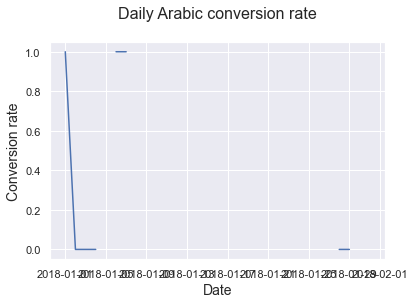

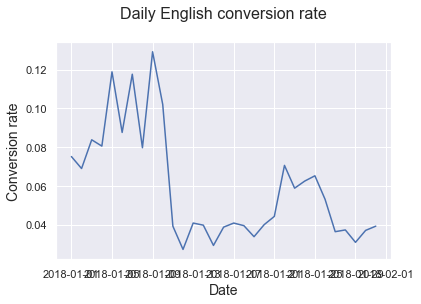

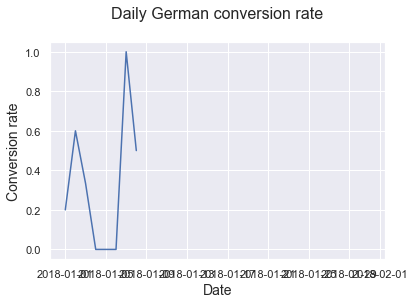

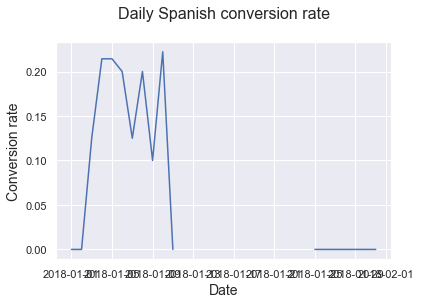

<Figure size 432x288 with 0 Axes>

In [114]:
# Isolate the rows where marketing channel is house ads

house_ads = df[df["marketing_channel"] == "House Ads"]

# Calculate conversion by date served and language displayed

conv_lang_channel = conversion_rate(house_ads, ["date_served","language_displayed"])

# Unstack conv_lang_channel

conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use plotting function to display results

plotting_conv(conv_lang_df)

In [115]:
## Creating DataFrame for House Ads

In [116]:
# Add the new column is correct language

house_ads["is_correct_langg"] = np.where(house_ads["language_preferred"]== house_ads["language_displayed"],"Yes","No")

/var/folders/0x/0p_9c8gx0_d6n6_1flpcvnnh0000gn/T/ipykernel_67236/513013311.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ads["is_correct_langg"] = np.where(house_ads["language_preferred"]== house_ads["language_displayed"],"Yes","No")


In [117]:
house_ads.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_correct_language,Dow,subscribed_year_2,subscribed_month_2,subscribed_month,subscribed_day_of_month,subscribed_day_of_year,subscribed_week_of_year,subscribed_day_of_week,subscribed_year,subscribed_is_wknd,subscribed_is_month_start,subscribed_is_month_end,subs_and_cancel_timing_difference,DoW_served,is_correct_langg
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,2018.0,1.0,1.0,1.0,1.0,1.0,0.0,2018.0,0.0,1,0,NaT,0.0,Yes
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,2018.0,1.0,1.0,1.0,1.0,1.0,0.0,2018.0,0.0,1,0,NaT,0.0,Yes
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,2018.0,1.0,1.0,1.0,1.0,1.0,0.0,2018.0,0.0,1,0,NaT,0.0,Yes
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,2018.0,1.0,1.0,1.0,1.0,1.0,0.0,2018.0,0.0,1,0,NaT,0.0,Yes
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,2018.0,1.0,1.0,1.0,1.0,1.0,0.0,2018.0,0.0,1,0,NaT,0.0,Yes


In [118]:
# Group by date_served and is_correct_langg

language_check = house_ads.groupby(["date_served","is_correct_langg"])["is_correct_langg"].count()

language_check

date_served  is_correct_langg
2018-01-01   No                    2
             Yes                 189
2018-01-02   No                    3
             Yes                 247
2018-01-03   Yes                 220
2018-01-04   Yes                 168
2018-01-05   Yes                 160
2018-01-06   No                    1
             Yes                 151
2018-01-07   No                    2
             Yes                 130
2018-01-08   Yes                 154
2018-01-09   Yes                 157
2018-01-10   Yes                 170
2018-01-11   No                   20
             Yes                 135
2018-01-12   No                   18
             Yes                 130
2018-01-13   No                   26
             Yes                 122
2018-01-14   No                   20
             Yes                 131
2018-01-15   No                   16
             Yes                 192
2018-01-16   No                   28
             Yes                 127
2018-01-

In [119]:
# Unstack language check and fill missing values with 0's

language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

print(language_check_df)

is_correct_langg    No    Yes
date_served                  
2018-01-01         2.0  189.0
2018-01-02         3.0  247.0
2018-01-03         0.0  220.0
2018-01-04         0.0  168.0
2018-01-05         0.0  160.0
2018-01-06         1.0  151.0
2018-01-07         2.0  130.0
2018-01-08         0.0  154.0
2018-01-09         0.0  157.0
2018-01-10         0.0  170.0
2018-01-11        20.0  135.0
2018-01-12        18.0  130.0
2018-01-13        26.0  122.0
2018-01-14        20.0  131.0
2018-01-15        16.0  192.0
2018-01-16        28.0  127.0
2018-01-17        21.0  127.0
2018-01-18        31.0  121.0
2018-01-19        22.0  127.0
2018-01-20        28.0  124.0
2018-01-21        14.0  100.0
2018-01-22        13.0   72.0
2018-01-23        16.0   69.0
2018-01-24        13.0   83.0
2018-01-25        19.0   74.0
2018-01-26        24.0   92.0
2018-01-27        18.0  149.0
2018-01-28        28.0  136.0
2018-01-29        24.0  142.0
2018-01-30        23.0  145.0
2018-01-31        23.0  135.0


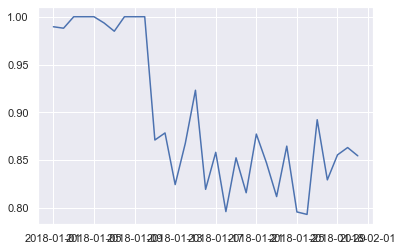

In [120]:
# Divide the count where language is correct by the row sum 

language_check_df["pct"] = language_check_df["Yes"] / language_check_df.sum(axis=1)

# Plot and show your results

plt.plot(language_check_df.index.values, language_check_df["pct"])
plt.show()

In [121]:
# Resolving Inconsistencies

In [122]:
# Calculate pre-error conversion rate

house_ads_bug = house_ads[house_ads["date_served"]<'2018-01-11']
lang_conv = conversion_rate(house_ads_bug, ["language_displayed"])

In [123]:
house_ads_bug

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_correct_language,Dow,subscribed_year_2,subscribed_month_2,subscribed_month,subscribed_day_of_month,subscribed_day_of_year,subscribed_week_of_year,subscribed_day_of_week,subscribed_year,subscribed_is_wknd,subscribed_is_month_start,subscribed_is_month_end,subs_and_cancel_timing_difference,DoW_served,is_correct_langg
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,2018.0,1.0,1.0,1.0,1.0,1.0,0.0,2018.0,0.0,1,0,NaT,0.0,Yes
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,2018.0,1.0,1.0,1.0,1.0,1.0,0.0,2018.0,0.0,1,0,NaT,0.0,Yes
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,2018.0,1.0,1.0,1.0,1.0,1.0,0.0,2018.0,0.0,1,0,NaT,0.0,Yes
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,2018.0,1.0,1.0,1.0,1.0,1.0,0.0,2018.0,0.0,1,0,NaT,0.0,Yes
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,2018.0,1.0,1.0,1.0,1.0,1.0,0.0,2018.0,0.0,1,0,NaT,0.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9961,a100007219,2018-01-05,House Ads,control,False,English,English,30-36 years,NaT,NaT,NaN,True,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaT,4.0,Yes
9964,a100007222,2018-01-08,House Ads,control,False,English,English,55+ years,NaT,NaT,NaN,True,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaT,0.0,Yes
9988,a100007246,2018-01-01,House Ads,control,False,English,English,24-30 years,NaT,NaT,NaN,True,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaT,0.0,Yes
9991,a100007249,2018-01-04,House Ads,control,False,English,English,45-55 years,NaT,NaT,NaN,True,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaT,3.0,Yes


In [124]:
lang_conv

language_displayed
Arabic     0.500000
English    0.099093
German     0.444444
Spanish    0.166667
Name: user_id, dtype: float64

In [125]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug, ['language_displayed']) 

# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


In [126]:
# Group house_ads by date and language

converted = house_ads.groupby(["date_served","language_preferred"]).agg({"user_id":"nunique","converted":"sum"})

# Unstack converted

converted_df = pd.DataFrame(converted.unstack(level=1))

converted_df

user_id                        converted                       
language_preferred  Arabic English German Spanish    Arabic English German Spanish
date_served                                                                       
2018-01-01             2.0   171.0    5.0    11.0         2      13      1       0
2018-01-02             3.0   200.0    5.0    10.0         0      14      3       0
2018-01-03             2.0   179.0    3.0     8.0         0      15      1       1
2018-01-04             2.0   149.0    2.0    14.0         0      12      0       3
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False       3
2018-01-06             3.0   136.0    2.0    11.0         3      12      0       2
2018-01-07             2.0   117.0    2.0    10.0         2      14      2       1
2018-01-08             NaN   138.0    6.0    10.0       NaN      11      3       2
2018-01-09             NaN   147.0    NaN    10.0       NaN      19    NaN       1
2018-01-10             NaN   147.0    4.0    18.0       NaN      15      2       4
2018-01-11             7.0   133.0    2.0    13.0         0       6      0       0
2018-01-12             3.0   129.0    4.0    11.0         0       3      0       1
2018-01-13             6.0   121.0    5.0    16.0         0       5      1       0
2018-01-14             5.0   131.0    3.0    12.0         0       6      0       0
2018-01-15             2.0   189.0    4.0    10.0         0       6      0       0
2018-01-16             7.0   127.0    4.0    17.0         0       6      0       0
2018-01-17             2.0   126.0    3.0    16.0         0       2      0       4
2018-01-18             7.0   121.0    6.0    18.0         0       5      1       0
2018-01-19             5.0   126.0    5.0    12.0         1       4      0       0
2018-01-20             6.0   124.0    6.0    14.0         1       4      1       0
2018-01-21             1.0    99.0    4.0     9.0     False       5      0       0
2018-01-22             2.0    72.0    3.0     8.0         1       4      1       0
2018-01-23             3.0    69.0    4.0     9.0         0       5      0       0
2018-01-24             2.0    83.0    3.0     8.0         0       6      0       0
2018-01-25             3.0    75.0    4.0    11.0         0       4      2       0
2018-01-26             6.0    89.0    3.0    16.0         0       4      0       2
2018-01-27             3.0   148.0    3.0    12.0         1       4      0       1
2018-01-28             5.0   134.0    3.0    21.0         0       4      0       2
2018-01-29             7.0   138.0    4.0    15.0         2       3      0       0
2018-01-30             4.0   139.0    3.0    18.0         0       4      0       2
2018-01-31             7.0   130.0    4.0    16.0         1       4      0       1

In [127]:
# Create English conversin rate column for affected period
converted_df["english_conv_rate"] = converted_df.loc['2018-01-11':'2018-01-31'][("converted","English")]
converted_df

user_id                        converted                        english_conv_rate
language_preferred  Arabic English German Spanish    Arabic English German Spanish                  
date_served                                                                                         
2018-01-01             2.0   171.0    5.0    11.0         2      13      1       0               NaN
2018-01-02             3.0   200.0    5.0    10.0         0      14      3       0               NaN
2018-01-03             2.0   179.0    3.0     8.0         0      15      1       1               NaN
2018-01-04             2.0   149.0    2.0    14.0         0      12      0       3               NaN
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False       3               NaN
2018-01-06             3.0   136.0    2.0    11.0         3      12      0       2               NaN
2018-01-07             2.0   117.0    2.0    10.0         2      14      2       1               NaN
2018-01-08             NaN   138.0    6.0    10.0       NaN      11      3       2               NaN
2018-01-09             NaN   147.0    NaN    10.0       NaN      19    NaN       1               NaN
2018-01-10             NaN   147.0    4.0    18.0       NaN      15      2       4               NaN
2018-01-11             7.0   133.0    2.0    13.0         0       6      0       0                 6
2018-01-12             3.0   129.0    4.0    11.0         0       3      0       1                 3
2018-01-13             6.0   121.0    5.0    16.0         0       5      1       0                 5
2018-01-14             5.0   131.0    3.0    12.0         0       6      0       0                 6
2018-01-15             2.0   189.0    4.0    10.0         0       6      0       0                 6
2018-01-16             7.0   127.0    4.0    17.0         0       6      0       0                 6
2018-01-17             2.0   126.0    3.0    16.0         0       2      0       4                 2
2018-01-18             7.0   121.0    6.0    18.0         0       5      1       0                 5
2018-01-19             5.0   126.0    5.0    12.0         1       4      0       0                 4
2018-01-20             6.0   124.0    6.0    14.0         1       4      1       0                 4
2018-01-21             1.0    99.0    4.0     9.0     False       5      0       0                 5
2018-01-22             2.0    72.0    3.0     8.0         1       4      1       0                 4
2018-01-23             3.0    69.0    4.0     9.0         0       5      0       0                 5
2018-01-24             2.0    83.0    3.0     8.0         0       6      0       0                 6
2018-01-25             3.0    75.0    4.0    11.0         0       4      2       0                 4
2018-01-26             6.0    89.0    3.0    16.0         0       4      0       2                 4
2018-01-27             3.0   148.0    3.0    12.0         1       4      0       1                 4
2018-01-28             5.0   134.0    3.0    21.0         0       4      0       2                 4
2018-01-29             7.0   138.0    4.0    15.0         2       3      0       0                 3
2018-01-30             4.0   139.0    3.0    18.0         0       4      0       2                 4
2018-01-31             7.0   130.0    4.0    16.0         1       4      0       1                 4

In [128]:
# Create expected conversion rates for each language
converted_df['expected_spanish_rate'] = converted_df['english_conv_rate']*spanish_index
converted_df['expected_arabic_rate'] = converted_df['english_conv_rate']*arabic_index
converted_df['expected_german_rate'] = converted_df['english_conv_rate']*german_index

In [129]:
converted_df

user_id                        converted                        english_conv_rate expected_spanish_rate expected_arabic_rate expected_german_rate
language_preferred  Arabic English German Spanish    Arabic English German Spanish                                                                                  
date_served                                                                                                                                                         
2018-01-01             2.0   171.0    5.0    11.0         2      13      1       0               NaN                   NaN                  NaN                  NaN
2018-01-02             3.0   200.0    5.0    10.0         0      14      3       0               NaN                   NaN                  NaN                  NaN
2018-01-03             2.0   179.0    3.0     8.0         0      15      1       1               NaN                   NaN                  NaN                  NaN
2018-01-04             2.0   149.0    2.0    14.0         0      12      0       3               NaN                   NaN                  NaN                  NaN
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False       3               NaN                   NaN                  NaN                  NaN
2018-01-06             3.0   136.0    2.0    11.0         3      12      0       2               NaN                   NaN                  NaN                  NaN
2018-01-07             2.0   117.0    2.0    10.0         2      14      2       1               NaN                   NaN                  NaN                  NaN
2018-01-08             NaN   138.0    6.0    10.0       NaN      11      3       2               NaN                   NaN                  NaN                  NaN
2018-01-09             NaN   147.0    NaN    10.0       NaN      19    NaN       1               NaN                   NaN                  NaN                  NaN
2018-01-10             NaN   147.0    4.0    18.0       NaN      15      2       4               NaN                   NaN                  NaN                  NaN
2018-01-11             7.0   133.0    2.0    13.0         0       6      0       0                 6             10.091549            30.274648            26.910798
2018-01-12             3.0   129.0    4.0    11.0         0       3      0       1                 3              5.045775            15.137324            13.455399
2018-01-13             6.0   121.0    5.0    16.0         0       5      1       0                 5              8.409624            25.228873            22.425665
2018-01-14             5.0   131.0    3.0    12.0         0       6      0       0                 6             10.091549            30.274648            26.910798
2018-01-15             2.0   189.0    4.0    10.0         0       6      0       0                 6             10.091549            30.274648            26.910798
2018-01-16             7.0   127.0    4.0    17.0         0       6      0       0                 6             10.091549            30.274648            26.910798
2018-01-17             2.0   126.0    3.0    16.0         0       2      0       4                 2               3.36385            10.091549             8.970266
2018-01-18             7.0   121.0    6.0    18.0         0       5      1       0                 5              8.409624            25.228873            22.425665
2018-01-19             5.0   126.0    5.0    12.0         1       4      0       0                 4                6.7277            20.183099            17.940532
2018-01-20             6.0   124.0    6.0    14.0         1       4      1       0                 4                6.7277            20.183099            17.940532
2018-01-21             1.0    99.0    4.0     9.0     False       5      0       0                 5              8.409624            25.228873            22.425665
2018-01-22             2.0    72.0    3.0     8.0         1

In [130]:
# Multiply number of users by the expected conversion rate
converted_df['expected_spanish_conv'] = converted_df['expected_spanish_rate']/100*converted_df[('user_id','Spanish')]
converted_df['expected_arabic_conv'] = converted_df['expected_arabic_rate']/100*converted_df[('user_id','Arabic')]
converted_df['expected_german_conv'] = converted_df['expected_german_rate']/100*converted_df[('user_id','German')]

In [131]:
converted_df

user_id                        converted                        english_conv_rate expected_spanish_rate expected_arabic_rate expected_german_rate expected_spanish_conv expected_arabic_conv expected_german_conv
language_preferred  Arabic English German Spanish    Arabic English German Spanish                                                                                                                                                  
date_served                                                                                                                                                                                                                         
2018-01-01             2.0   171.0    5.0    11.0         2      13      1       0               NaN                   NaN                  NaN                  NaN                   NaN                  NaN                  NaN
2018-01-02             3.0   200.0    5.0    10.0         0      14      3       0               NaN                   NaN                  NaN                  NaN                   NaN                  NaN                  NaN
2018-01-03             2.0   179.0    3.0     8.0         0      15      1       1               NaN                   NaN                  NaN                  NaN                   NaN                  NaN                  NaN
2018-01-04             2.0   149.0    2.0    14.0         0      12      0       3               NaN                   NaN                  NaN                  NaN                   NaN                  NaN                  NaN
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False       3               NaN                   NaN                  NaN                  NaN                   NaN                  NaN                  NaN
2018-01-06             3.0   136.0    2.0    11.0         3      12      0       2               NaN                   NaN                  NaN                  NaN                   NaN                  NaN                  NaN
2018-01-07             2.0   117.0    2.0    10.0         2      14      2       1               NaN                   NaN                  NaN                  NaN                   NaN                  NaN                  NaN
2018-01-08             NaN   138.0    6.0    10.0       NaN      11      3       2               NaN                   NaN                  NaN                  NaN                   NaN                  NaN                  NaN
2018-01-09             NaN   147.0    NaN    10.0       NaN      19    NaN       1               NaN                   NaN                  NaN                  NaN                   NaN                  NaN                  NaN
2018-01-10             NaN   147.0    4.0    18.0       NaN      15      2       4               NaN                   NaN                  NaN                  NaN                   NaN                  NaN                  NaN
2018-01-11             7.0   133.0    2.0    13.0         0       6      0       0                 6             10.091549            30.274648            26.910798              1.311901             2.119225             0.538216
2018-01-12             3.0   129.0    4.0    11.0         0       3      0       1                 3              5.045775            15.137324            13.455399              0.555035              0.45412             0.538216
2018-01-13             6.0   121.0    5.0    16.0         0       5      1       0                 5              8.409624            25.228873            22.425665               1.34554             1.513732             1.121283
2018-01-14             5.0   131.0    3.0    12.0         0       6      0       0                 6             10.091549            30.274648            26.910798              1.210986             1.513732             0.807324
2018-01-15             2.0   189.0    4.0    10.0         0       6      0       0                 6             10.091549    

In [132]:
# Use .loc to slice only the relevant dates
converted_df = converted_df.loc['2018-01-11':'2018-01-31']

# Sum expected subscribers for each language
expected_subs = converted_df['expected_spanish_conv'].sum() + converted_df['expected_arabic_conv'].sum() + converted_df['expected_german_conv'].sum()

# Calculate how many subscribers we actually got
actual_subs = converted_df[('converted','Spanish')].sum() + converted_df[('converted','Arabic')].sum() + converted_df[('converted','German')].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
print(lost_subs)

32.144143192488265
